<a href="https://colab.research.google.com/github/Kevin-1992/Customer-service-Airline/blob/main/Customer_service_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Setting dataset
Airline_df = pd.read_csv('/content/drive/My Drive/Base de datos para practicar/Customer service Airline.csv')

In [ ]:
Airline_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
Airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
#Transforming y to 1/0
Airline_df['satisfaction'] = Airline_df['satisfaction'].apply(lambda x:1 if x == 'satisfied' else 0 )

In [ ]:
Airline_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


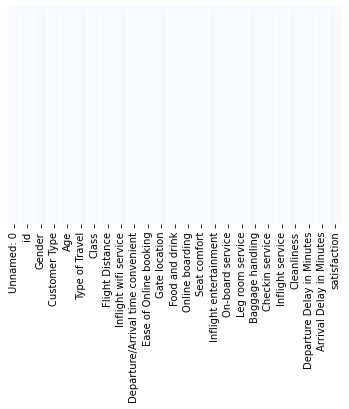

In [ ]:
#Checking for missing info
sns.heatmap(Airline_df.isnull(),yticklabels = False, cbar = False, cmap= 'Blues')

In [ ]:
Airline_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
Airline_df.loc[(Airline_df['Arrival Delay in Minutes'].isnull() == True), 'Arrival Delay in Minutes'] = Airline_df['Arrival Delay in Minutes'].mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe016fb59b0>,
      dtype=object)

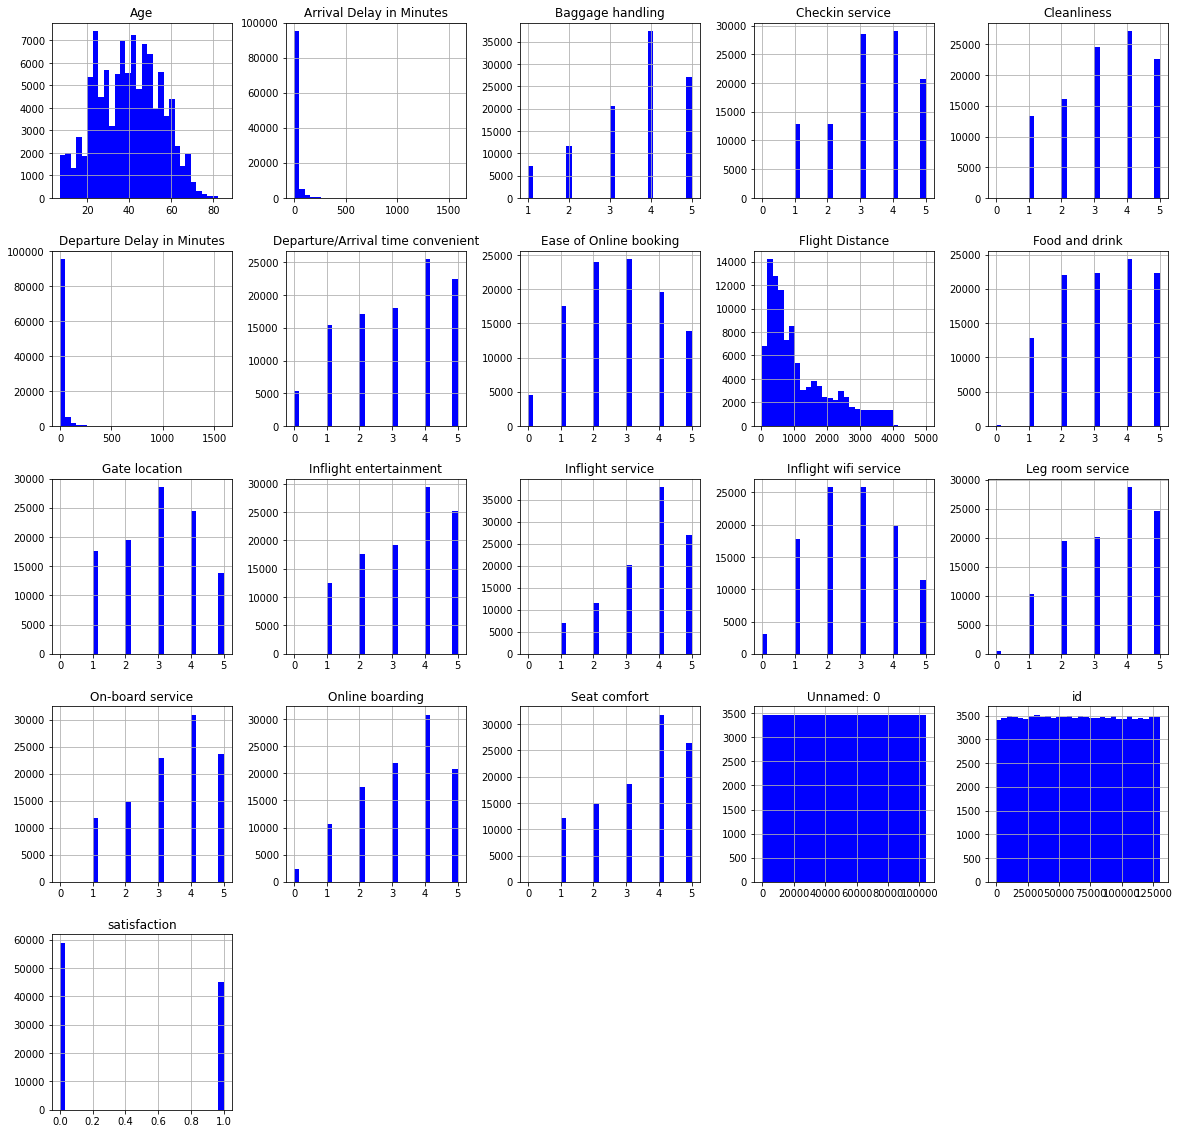

In [ ]:
#Exploring data with histogram
Airline_df.hist(bins =30, figsize = (20,20), color = 'b')

In [ ]:
#Explorig dataset divided y
satisfied_df = Airline_df[Airline_df['satisfaction']==1]
unsatisfied_df = Airline_df[Airline_df['satisfaction']==0]
satisfied_df
unsatisfied_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,0
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,4,2,3,2,2,4,3,4,2,4,2,0,0.0,0
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [ ]:
print('Sample size =', len(Airline_df))
print('Number of unsatisfied customers =', len(unsatisfied_df))
print('% of unsatisfied customers =', 1.*len(unsatisfied_df)/len(unsatisfied_df)*100,'%')
print('Number of satisfied customers=', len(satisfied_df))
print('% of satisfied customers =', 1.*len(satisfied_df)/len(Airline_df)*100,'%')

Sample size = 103904
Number of unsatisfied customers = 58879
% of unsatisfied customers = 100.0 %
Number of satisfied customers= 45025
% of satisfied customers = 43.333269171542966 %


In [ ]:
unsatisfied_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.0
mean,52075.578746,64474.259176,37.566688,928.919971,2.399633,3.129112,2.546850,2.976121,2.958050,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123,16.503728,17.121512,0.0
std,29977.755481,37546.516040,16.459825,790.452308,0.964348,1.500368,1.205847,1.198500,1.346607,1.145905,1.303142,1.323619,1.285790,1.303159,1.176978,1.281158,1.175603,1.325955,40.191886,40.497655,0.0
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,26174.500000,31835.500000,25.000000,372.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.0
50%,52130.000000,63970.000000,36.000000,671.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.0
75%,78063.500000,97144.500000,50.000000,1158.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000,16.000000,0.0
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,0.0


In [ ]:
satisfied_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.0
mean,51789.242754,65512.609928,41.750583,1530.140255,3.161288,2.970305,3.031582,2.977879,3.521310,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342,12.608084,12.638043,1.0
std,30016.277260,37347.622538,12.767833,1128.126574,1.588697,1.552213,1.575306,1.374244,1.236187,1.191609,1.142077,1.076907,1.127130,1.175515,1.099607,1.158732,1.091486,1.142247,35.382595,35.911109,0.0
min,2.000000,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,25679.000000,33366.000000,32.000000,526.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.0
50%,51695.000000,65862.000000,43.000000,1250.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,1.0
75%,77741.000000,97691.000000,51.000000,2405.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,8.000000,1.0
max,103900.000000,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.0


In [ ]:
#Separating categorical data
X_cat = Airline_df[['Gender','Customer Type','Type of Travel','Class']]

In [ ]:
X_cat

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco
103900,Male,Loyal Customer,Business travel,Business
103901,Male,disloyal Customer,Business travel,Business
103902,Female,disloyal Customer,Business travel,Eco


In [ ]:
X_cat.describe()

,Gender,Customer Type,Type of Travel,Class
count,103904,103904,103904,103904
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,52727,84923,71655,49665


In [ ]:
#Exploring categorical data

## GENDER

The sample shows that its reletavely equaly distributed by gender, 

In [ ]:
#Population divided by gender
male = (X_cat['Gender'].tolist().count('Male'))
female = (X_cat['Gender'].tolist().count('Female'))
male, female

(51177, 52727)

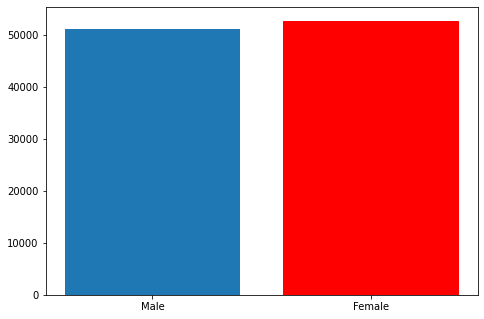

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender_type = ['Male','Female']
gender_count = male,female
ax.bar(gender_type,gender_count)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

In [ ]:
#Satisfied population divided by gender
male_satisfied = (satisfied_df['Gender'].tolist().count('Male'))
female_satisfied = (satisfied_df['Gender'].tolist().count('Female'))
male_satisfied, female_satisfied

(22491, 22534)

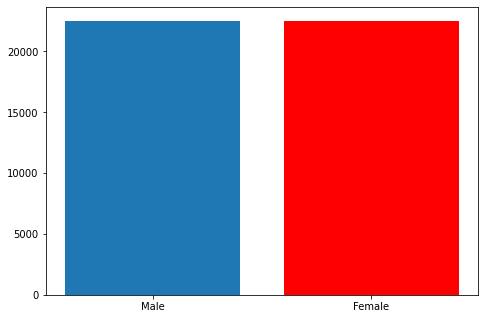

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender_type_s = ['Male','Female']
gender_count_s = male_satisfied,female_satisfied
ax.bar(gender_type_s,gender_count_s)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

In [ ]:
#Unsatisfied population divided by gender
male_unsatisfied = (unsatisfied_df['Gender'].tolist().count('Male'))
female_unsatisfied = (unsatisfied_df['Gender'].tolist().count('Female'))
male_unsatisfied, female_unsatisfied

(28686, 30193)

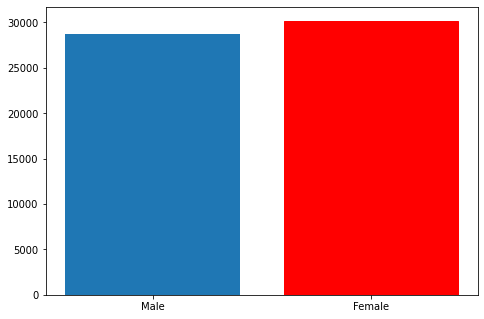

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender_type_u = ['Male','Female']
gender_count_u = male_unsatisfied,female_unsatisfied
ax.bar(gender_type_u,gender_count_u)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

### GENDER SUMMARY

In [ ]:
print('Sample size Male =', male)
print('Number of unsatisfied Male customers =',male_unsatisfied)
print('% of unsatisfied Male customers =', 1.*male_unsatisfied/male*100,'%')
print('Number of satisfied Male customers=',male_satisfied)
print('% of satisfied Male customers =', 1.* male_satisfied/male*100,'%')

Sample size Male = 51177
Number of unsatisfied Male customers = 28686
% of unsatisfied Male customers = 56.052523594583505 %
Number of satisfied Male customers= 22491
% of satisfied Male customers = 43.947476405416495 %


In [ ]:
print('Sample size Female =', female)
print('Number of unsatisfied Female customers =',female_unsatisfied)
print('% of unsatisfied Female customers =', 1.*female_unsatisfied/female*100,'%')
print('Number of satisfied Female customers =',female_satisfied)
print('% of satisfied Female customers =', 1.*female_satisfied/female*100,'%')

Sample size Female = 52727
Number of unsatisfied Female customers = 30193
% of unsatisfied Female customers = 57.26288239421928 %
Number of satisfied Female customers = 22534
% of satisfied Female customers = 42.737117605780725 %


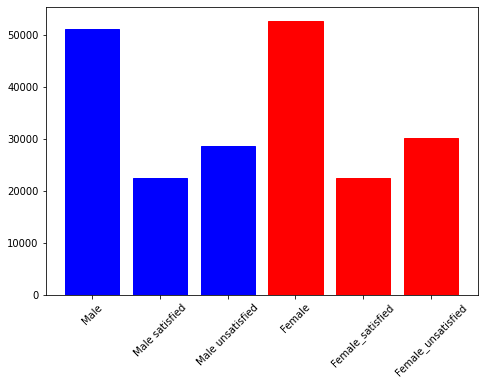

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender_type_u = ['Male','Male satisfied','Male unsatisfied','Female','Female_satisfied','Female_unsatisfied']
gender_count_u = male,male_satisfied,male_unsatisfied,female,female_satisfied,female_unsatisfied
ax.bar(gender_type_u,gender_count_u)
ax.get_children()
ax.get_children()[0].set_color('b')
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('b')
ax.get_children()[3].set_color('r')
ax.get_children()[4].set_color('r')
ax.get_children()[5].set_color('r')
plt.xticks(rotation=45)
plt.show()

## LOYALTY

In [ ]:
loyal = (X_cat['Customer Type'].tolist().count('Loyal Customer'))
disloyal = (X_cat['Customer Type'].tolist().count('disloyal Customer'))
loyal, disloyal

(84923, 18981)

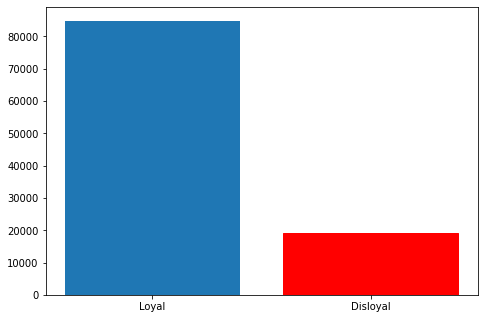

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
loyalty_type = ['Loyal','Disloyal']
loyalty_count = loyal,disloyal
ax.bar(loyalty_type,loyalty_count)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

In [ ]:
loyal_satisfied = (satisfied_df['Customer Type'].tolist().count('Loyal Customer'))
disloyal_satisfied = (satisfied_df['Customer Type'].tolist().count('disloyal Customer'))
loyal_satisfied, disloyal_satisfied

(40533, 4492)

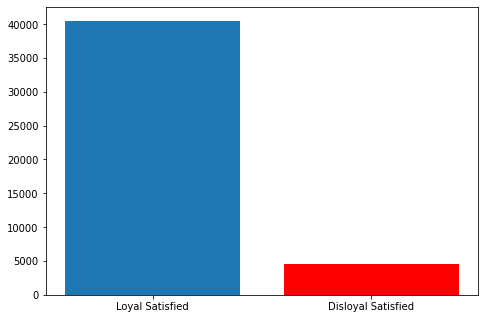

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
loyalty_type_s = ['Loyal Satisfied','Disloyal Satisfied']
loyalty_count_s = loyal_satisfied,disloyal_satisfied
ax.bar(loyalty_type_s, loyalty_count_s)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

In [ ]:
loyal_unsatisfied = (unsatisfied_df['Customer Type'].tolist().count('Loyal Customer'))
disloyal_unsatisfied = (unsatisfied_df['Customer Type'].tolist().count('disloyal Customer'))
loyal_unsatisfied, disloyal_unsatisfied

(44390, 14489)

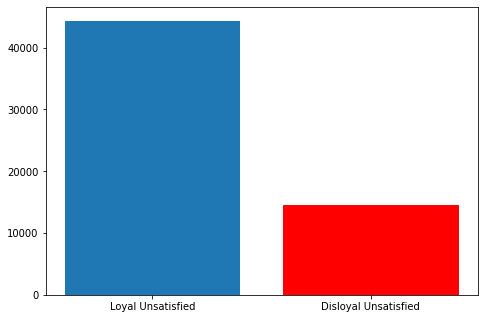

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
loyalty_type_u = ['Loyal Unsatisfied','Disloyal Unsatisfied']
loyalty_count_u = loyal_unsatisfied,disloyal_unsatisfied
ax.bar(loyalty_type_u,loyalty_count_u)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

### LOYALTY SUMMARY

In [ ]:
print('Sample size loyal =', loyal)
print('Number of unsatisfied loyal customers =',loyal_unsatisfied)
print('% of unsatisfied loyal customers =', 1.*loyal_unsatisfied/loyal*100,'%')
print('Number of satisfied loyal customers=',loyal_satisfied)
print('% of satisfied loyal customers =', 1.* loyal_satisfied/loyal*100,'%')

print('Sample size disloyal =', disloyal)
print('Number of unsatisfied disloyal customers =',disloyal_unsatisfied)
print('% of unsatisfied disloyal customers =', 1.*disloyal_unsatisfied/disloyal*100,'%')
print('Number of satisfied disloyal customers =',disloyal_satisfied)
print('% of satisfied disloyal customers =', 1.*disloyal_satisfied/disloyal*100,'%')

Sample size loyal = 84923
Number of unsatisfied loyal customers = 44390
% of unsatisfied loyal customers = 52.270880680145545 %
Number of satisfied loyal customers= 40533
% of satisfied loyal customers = 47.729119319854455 %
Sample size disloyal = 18981
Number of unsatisfied disloyal customers = 14489
% of unsatisfied disloyal customers = 76.33422896580791 %
Number of satisfied disloyal customers = 4492
% of satisfied disloyal customers = 23.665771034192087 %


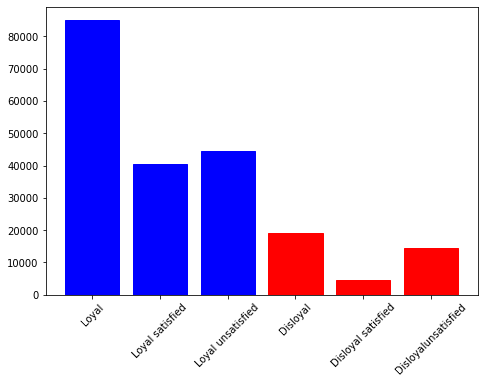

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
loyalty_type_x = ['Loyal','Loyal satisfied','Loyal unsatisfied','Disloyal','Disloyal satisfied','Disloyalunsatisfied']
loyalty_count_x = loyal,loyal_satisfied,loyal_unsatisfied,disloyal,disloyal_satisfied,disloyal_unsatisfied
ax.bar(loyalty_type_x,loyalty_count_x)
ax.get_children()
ax.get_children()[0].set_color('b')
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('b')
ax.get_children()[3].set_color('r')
ax.get_children()[4].set_color('r')
ax.get_children()[5].set_color('r')
plt.xticks(rotation=45)
plt.show()

## TYPE OF TRAVEL

In [ ]:
business_travel = (X_cat['Type of Travel'].tolist().count('Business travel'))
personal_travel = (X_cat['Type of Travel'].tolist().count('Personal Travel'))
business_travel, personal_travel

(71655, 32249)

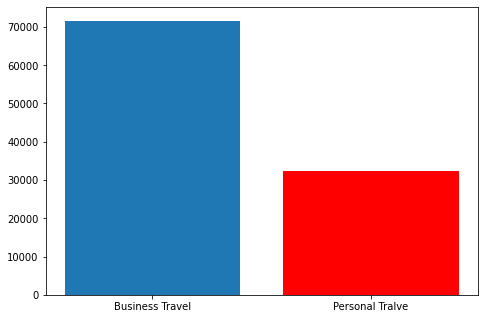

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
travel_type = ['Business Travel','Personal Tralve']
travel_count = business_travel,personal_travel
ax.bar(travel_type,travel_count)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

In [ ]:
business_travel_satisfied = (satisfied_df['Type of Travel'].tolist().count('Business travel'))
personal_travel_satisfied = (satisfied_df['Type of Travel'].tolist().count('Personal Travel'))
business_travel_satisfied, personal_travel_satisfied

(41746, 3279)

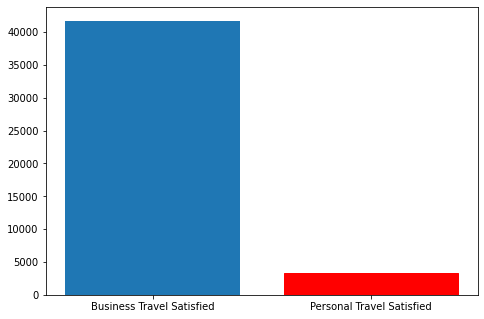

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
travel_type_s = ['Business Travel Satisfied','Personal Travel Satisfied']
travel_count_s = business_travel_satisfied,personal_travel_satisfied
ax.bar(travel_type_s,travel_count_s)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

In [ ]:
business_travel_unsatisfied = (unsatisfied_df['Type of Travel'].tolist().count('Business travel'))
personal_travel_unsatisfied = (unsatisfied_df['Type of Travel'].tolist().count('Personal Travel'))
business_travel_unsatisfied, personal_travel_unsatisfied

(29909, 28970)

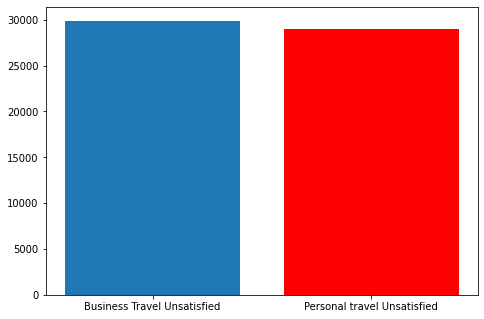

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
travel_type_u = ['Business Travel Unsatisfied','Personal travel Unsatisfied']
travel_count_u = business_travel_unsatisfied,personal_travel_unsatisfied
ax.bar(travel_type_u,travel_count_u)
ax.get_children()
ax.get_children()[1].set_color('r')
plt.show()

### TYPE OF TRAVEL SUMMARY

In [ ]:
print('Sample size business travel customer =', business_travel)
print('Number of unsatisfied business travel customers =',business_travel_unsatisfied)
print('% of unsatisfied business travel customers =', 1.*business_travel_unsatisfied/business_travel*100,'%')
print('Number of satisfied business travel customers=',business_travel_satisfied)
print('% of satisfied business travel customers =', 1.* business_travel_satisfied/business_travel*100,'%')

print('Sample size personal travel customers =', personal_travel)
print('Number of unsatisfied personal travel customers =',personal_travel_unsatisfied)
print('% of unsatisfied personal travel customers =', 1.*personal_travel_unsatisfied/personal_travel*100,'%')
print('Number of satisfied personal travel customers =',personal_travel_satisfied)
print('% of satisfied personal travel customers =', 1.*personal_travel_satisfied/personal_travel*100,'%')

Sample size business travel customer = 71655
Number of unsatisfied business travel customers = 29909
% of unsatisfied business travel customers = 41.74028330193288 %
Number of satisfied business travel customers= 41746
% of satisfied business travel customers = 58.25971669806713 %
Sample size personal travel customers = 32249
Number of unsatisfied personal travel customers = 28970
% of unsatisfied personal travel customers = 89.83224286024372 %
Number of satisfied personal travel customers = 3279
% of satisfied personal travel customers = 10.16775713975627 %


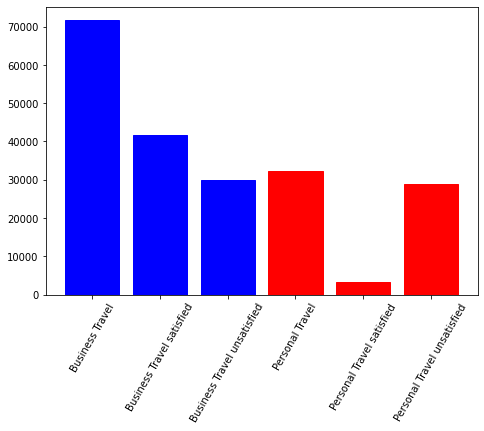

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
travel_type_x = ['Business Travel','Business Travel satisfied','Business Travel unsatisfied','Personal Travel','Personal Travel satisfied','Personal Travel unsatisfied']
travel_count_x = business_travel,business_travel_satisfied,business_travel_unsatisfied, personal_travel,personal_travel_satisfied,personal_travel_unsatisfied
ax.bar(travel_type_x,travel_count_x)
ax.get_children()
ax.get_children()[0].set_color('b')
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('b')
ax.get_children()[3].set_color('r')
ax.get_children()[4].set_color('r')
ax.get_children()[5].set_color('r')
plt.xticks(rotation=60)
plt.show()

## CLASS

In [ ]:
eco = (X_cat['Class'].tolist().count('Eco'))
eco_plus = (X_cat['Class'].tolist().count('Eco Plus'))
business_class = (X_cat['Class'].tolist().count('Business'))
eco,eco_plus,business_class

(46745, 7494, 49665)

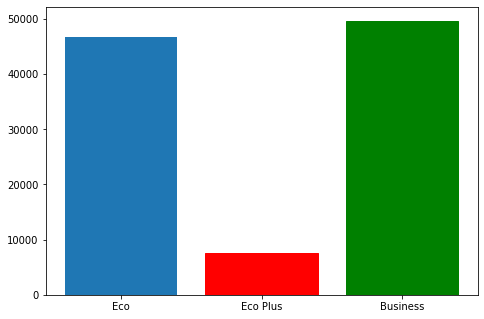

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
class_type = ['Eco','Eco Plus','Business']
class_count = eco,eco_plus,business_class
ax.bar(class_type,class_count)
ax.get_children()
ax.get_children()[1].set_color('r')
ax.get_children()[2].set_color('g')
plt.show()

In [ ]:
eco_s = (satisfied_df['Class'].tolist().count('Eco'))
eco_plus_s = (satisfied_df['Class'].tolist().count('Eco Plus'))
business_class_s = (satisfied_df['Class'].tolist().count('Business'))
eco_s,eco_plus_s,business_class_s

(8701, 1844, 34480)

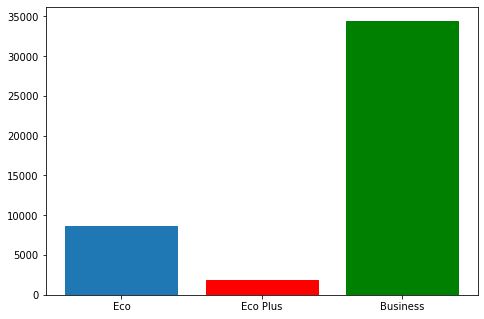

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
class_type_s = ['Eco','Eco Plus','Business']
class_count_s = eco_s,eco_plus_s,business_class_s
ax.bar(class_type_s,class_count_s)
ax.get_children()
ax.get_children()[1].set_color('r')
ax.get_children()[2].set_color('g')
plt.show()

In [ ]:
eco_u = (unsatisfied_df['Class'].tolist().count('Eco'))
eco_plus_u = (unsatisfied_df['Class'].tolist().count('Eco Plus'))
business_class_u = (unsatisfied_df['Class'].tolist().count('Business'))
eco_u,eco_plus_u,business_class_u

(38044, 5650, 15185)

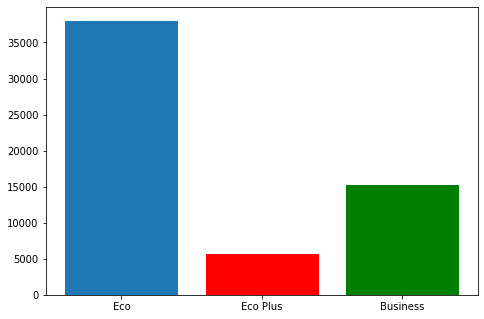

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
class_type_u = ['Eco','Eco Plus','Business']
class_count_u = eco_u,eco_plus_u,business_class_u
ax.bar(class_type_u,class_count_u)
ax.get_children()
ax.get_children()[1].set_color('r')
ax.get_children()[2].set_color('g')
plt.show()

### CLASS SUMMARY

In [ ]:
print('Sample size Eco =', eco)
print('Number of unsatisfied Eco customers =',eco_u)
print('% of unsatisfied Eco customers =', 1.*eco_u/eco*100,'%')
print('Number of satisfied Eco customers=',eco_s)
print('% of satisfied Eco customers =', 1.* eco_s/eco_u*100,'%')

print('Sample size Eco Plus =', eco_plus)
print('Number of unsatisfied Eco Plus customers =',eco_u)
print('% of unsatisfied Eco Plus customers =', 1.*eco_plus_u/eco_plus*100,'%')
print('Number of satisfied Eco Plus customers =',eco_plus_s)
print('% of satisfied Eco Plus customers =', 1.*eco_plus_s/eco_plus*100,'%')

print('Sample size Business =', business_class)
print('Number of unsatisfied Business customers =',business_class_u)
print('% of unsatisfied Business customers =', 1.*business_class_u/business_class*100,'%')
print('Number of satisfied Business customers =',business_class_s)
print('% of satisfied Business customers =', 1.*business_class_s/business_class*100,'%')

Sample size Eco = 46745
Number of unsatisfied Eco customers = 38044
% of unsatisfied Eco customers = 81.38624451813028 %
Number of satisfied Eco customers= 8701
% of satisfied Eco customers = 22.870886342130163 %
Sample size Eco Plus = 7494
Number of unsatisfied Eco Plus customers = 38044
% of unsatisfied Eco Plus customers = 75.39364825193489 %
Number of satisfied Eco Plus customers = 1844
% of satisfied Eco Plus customers = 24.60635174806512 %
Sample size Business = 49665
Number of unsatisfied Business customers = 15185
% of unsatisfied Business customers = 30.574851505084062 %
Number of satisfied Business customers = 34480
% of satisfied Business customers = 69.42514849491593 %


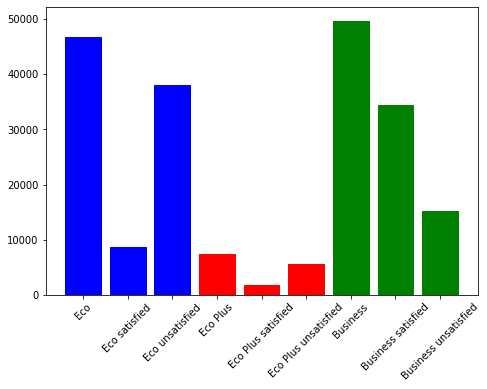

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
class_type_x = ['Eco','Eco satisfied','Eco unsatisfied','Eco Plus','Eco Plus satisfied','Eco Plus unsatisfied','Business', 'Business satisfied', 'Business unsatisfied']
class_count_x = eco,eco_s,eco_u,eco_plus,eco_plus_s,eco_plus_u,business_class,business_class_s,business_class_u
ax.bar(class_type_x,class_count_x)
ax.get_children()
ax.get_children()[0].set_color('b')
ax.get_children()[1].set_color('b')
ax.get_children()[2].set_color('b')
ax.get_children()[3].set_color('r')
ax.get_children()[4].set_color('r')
ax.get_children()[5].set_color('r')
ax.get_children()[6].set_color('g')
ax.get_children()[7].set_color('g')
ax.get_children()[8].set_color('g')
plt.xticks(rotation=45)
plt.show()

## CORRELATIONS

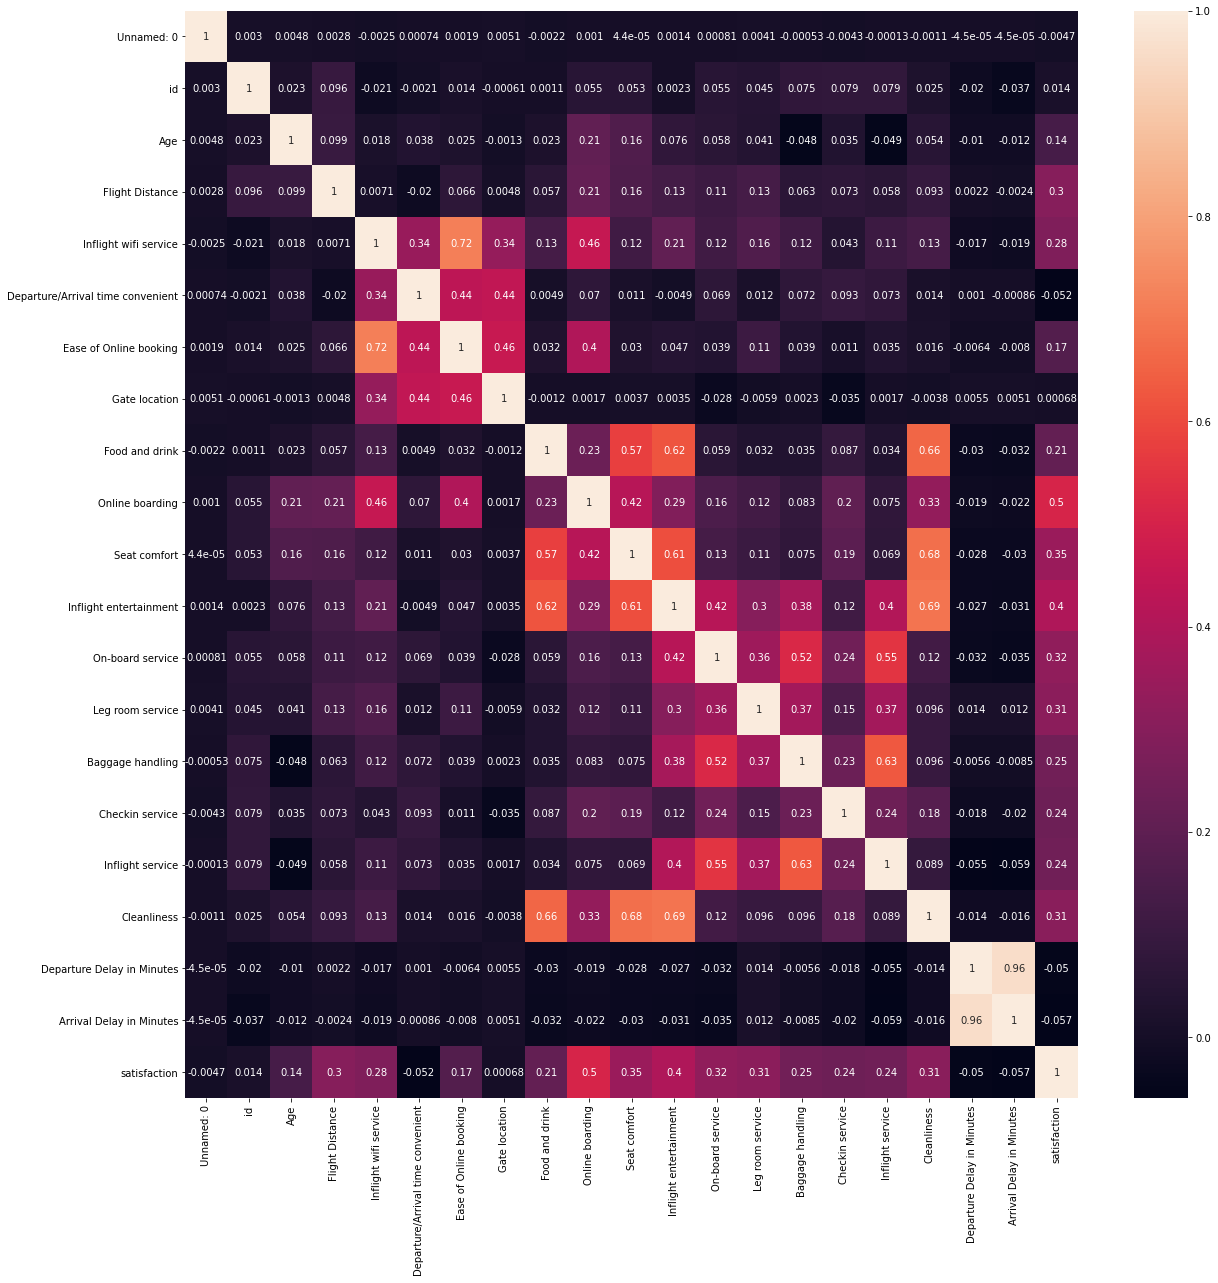

In [ ]:
correlations = Airline_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)


    Ease of booking and inflight wifi service
    Cleanliness and Food and drink
    Cleanliness and Seat comfort
    Cleanliness and inflight entertainment
    Inflight service and baggage handeling


Text(0.5, 0, 'cleanliness raiting')

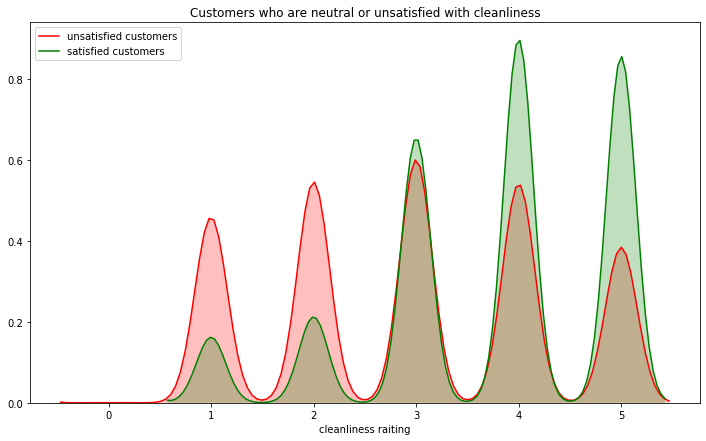

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Cleanliness'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Cleanliness'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with cleanliness')
plt.xlabel ('cleanliness raiting')

Text(0.5, 0, 'Inflight wifi service')

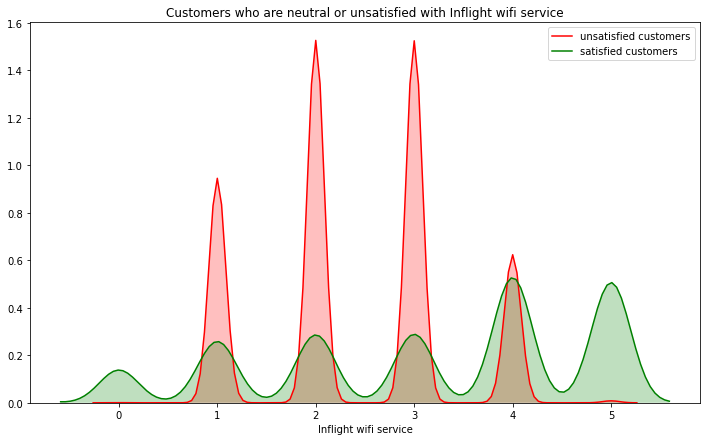

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Inflight wifi service'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Inflight wifi service'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Inflight wifi service')
plt.xlabel ('Inflight wifi service')

Text(0.5, 0, 'Departure/Arrival time convenient')

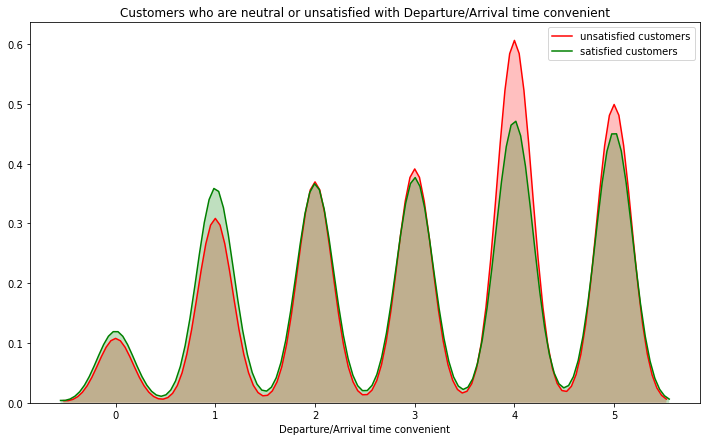

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Departure/Arrival time convenient'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Departure/Arrival time convenient'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Departure/Arrival time convenient')
plt.xlabel ('Departure/Arrival time convenient')

Text(0.5, 0, 'Ease of Online booking')

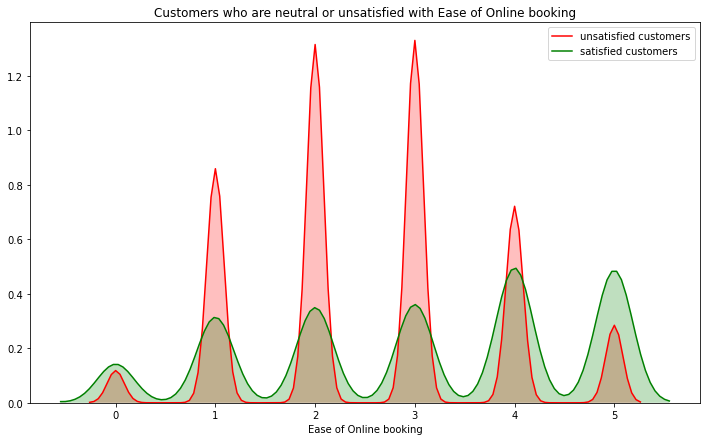

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Ease of Online booking'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Ease of Online booking'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Ease of Online booking')
plt.xlabel ('Ease of Online booking')

Text(0.5, 0, 'Gate location')

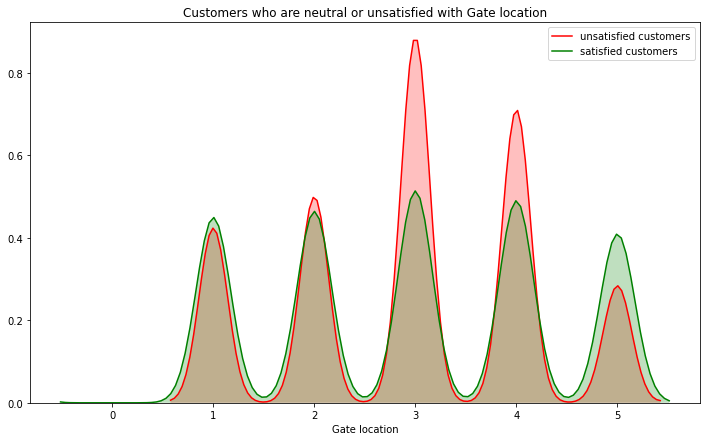

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Gate location'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Gate location'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Gate location')
plt.xlabel ('Gate location')

Text(0.5, 0, 'Food and drink')

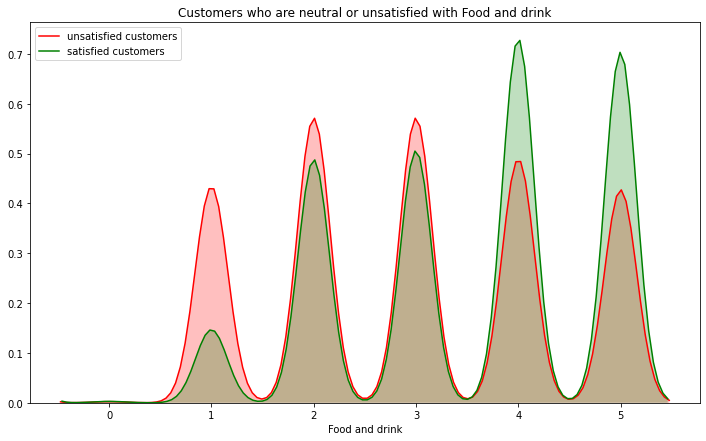

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Food and drink'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Food and drink'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Food and drink')
plt.xlabel ('Food and drink')

Text(0.5, 0, 'Online boarding')

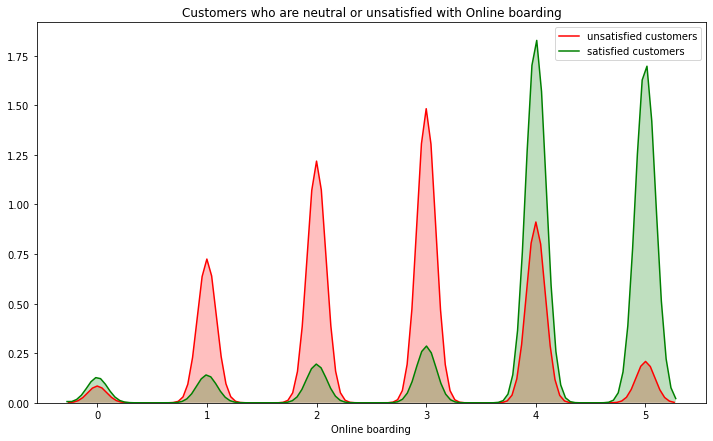

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Online boarding'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Online boarding'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Online boarding')
plt.xlabel ('Online boarding')

Text(0.5, 0, 'Seat comfort')

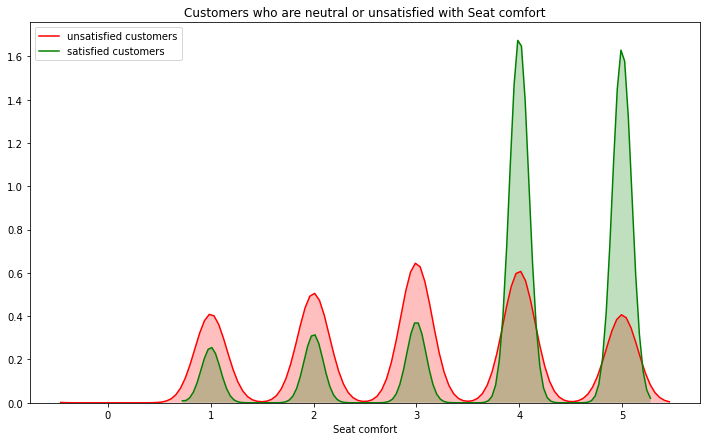

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Seat comfort'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Seat comfort'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Seat comfort')
plt.xlabel ('Seat comfort')

Text(0.5, 0, 'Inflight entertainment')

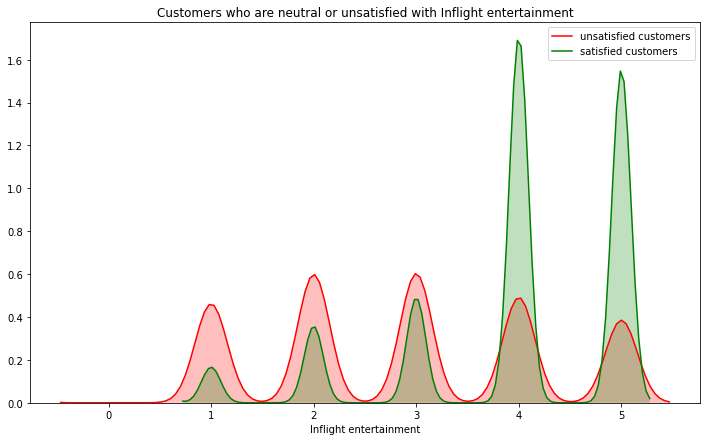

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Inflight entertainment'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Inflight entertainment'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Inflight entertainment')
plt.xlabel ('Inflight entertainment')

Text(0.5, 0, 'On-board service')

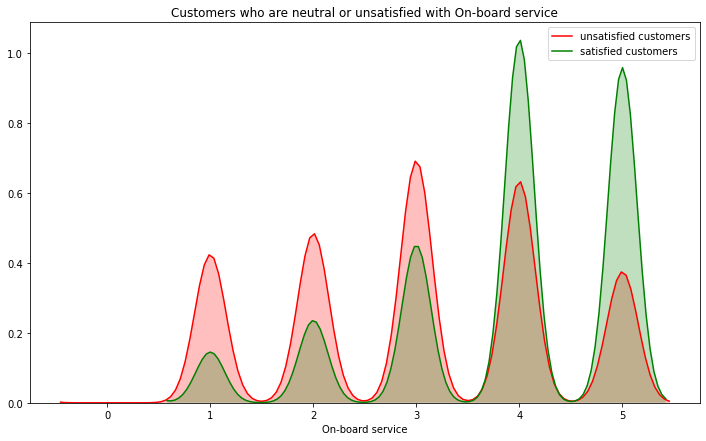

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['On-board service'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['On-board service'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with On-board service')
plt.xlabel ('On-board service')

Text(0.5, 0, 'Leg room service')

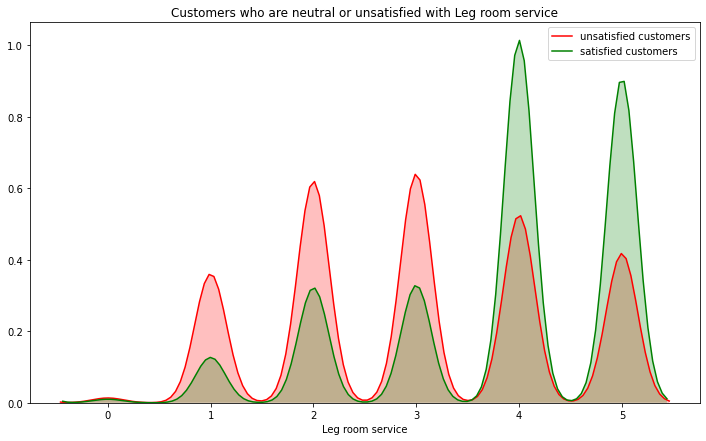

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Leg room service'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Leg room service'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Leg room service')
plt.xlabel ('Leg room service')

Text(0.5, 0, 'Baggage handling')

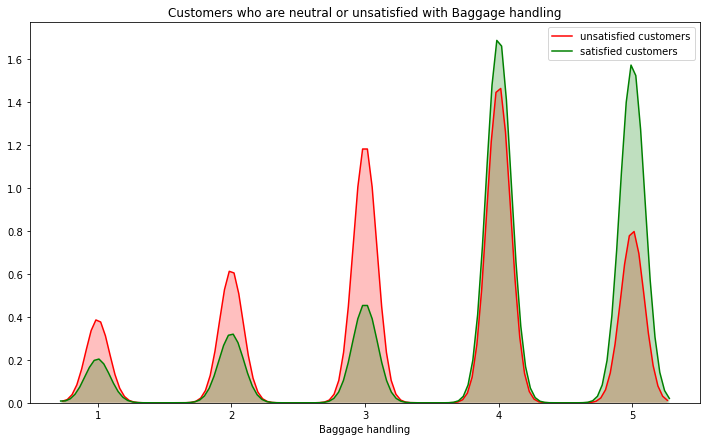

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Baggage handling'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Baggage handling'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Baggage handling')
plt.xlabel ('Baggage handling')

Text(0.5, 0, 'Checkin service')

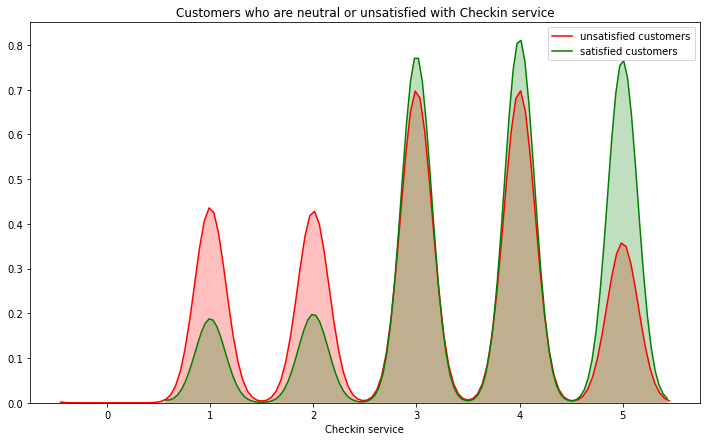

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Checkin service'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Checkin service'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Checkin service')
plt.xlabel ('Checkin service')

Text(0.5, 0, 'Inflight service')

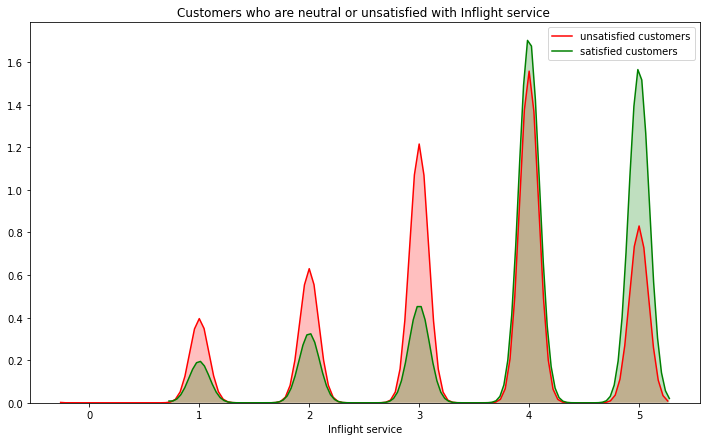

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Inflight service'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Inflight service'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Inflight service ')
plt.xlabel ('Inflight service')

Text(0.5, 0, 'Cleanliness')

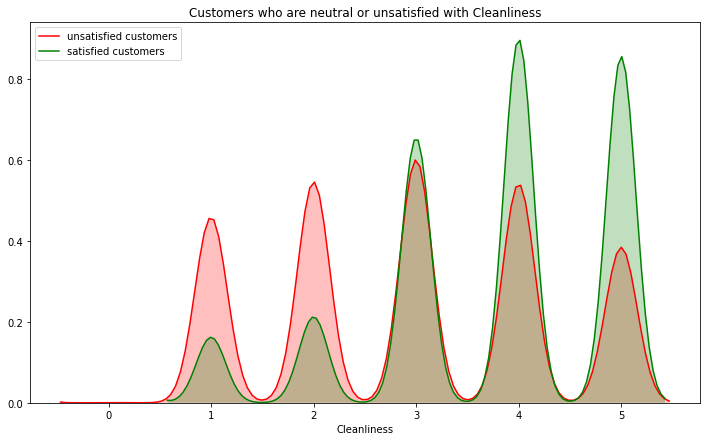

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Cleanliness'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Cleanliness'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied with Cleanliness')
plt.xlabel ('Cleanliness')

Text(0.5, 0, 'Departure Delay in Minutes')

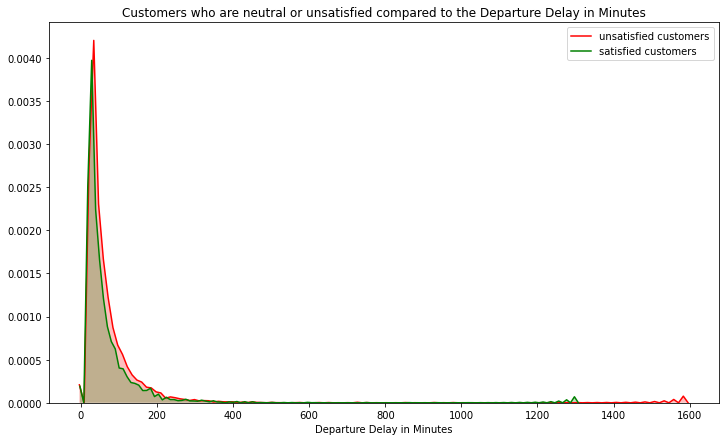

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Departure Delay in Minutes'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Departure Delay in Minutes'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied compared to the Departure Delay in Minutes')
plt.xlabel ('Departure Delay in Minutes')

Text(0.5, 0, 'Arrival Delay in Minutes')

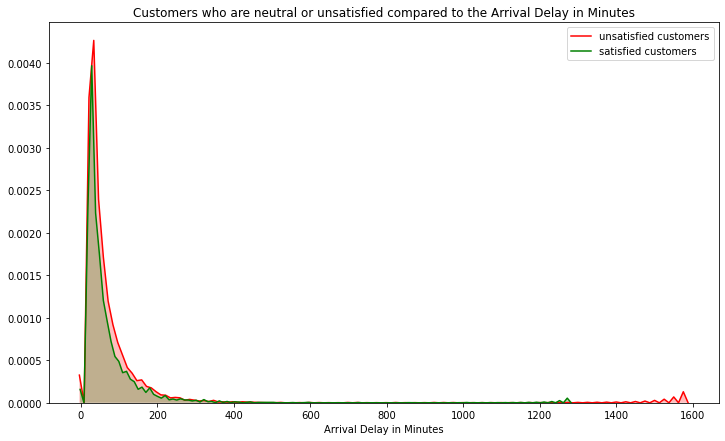

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(unsatisfied_df['Arrival Delay in Minutes'], label = 'unsatisfied customers', shade = True, color = 'r')
sns.kdeplot(satisfied_df['Arrival Delay in Minutes'], label = 'satisfied customers', shade = True, color = 'g')
plt.title('Customers who are neutral or unsatisfied compared to the Arrival Delay in Minutes')
plt.xlabel ('Arrival Delay in Minutes')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [ ]:
X_cat.shape 

(103904, 9)

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_numerical = Airline_df[['Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [ ]:
X_all = pd.concat([X_cat,X_numerical], axis=1)

In [ ]:
X_all

,0,1,2,3,4,5,6,7,8,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.57035176e-02, 1.13636364e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e-01, 6.28140704e-04, 3.78787879e-03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.00000000e-01, 4.39698492e-03, 8.83838384e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
y = Airline_df['satisfaction']
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

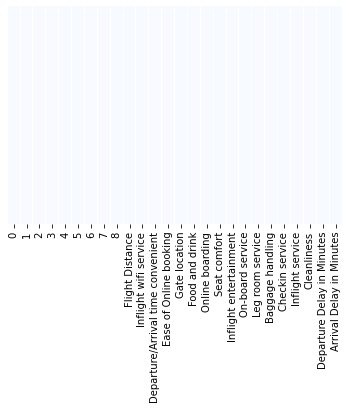

In [ ]:
sns.heatmap(X_all.isnull(),yticklabels = False, cbar = False, cmap= 'Blues')

# TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy{}%'.format(100 *  accuracy_score(y_pred, y_test)))

Accuracy87.59924931427746%


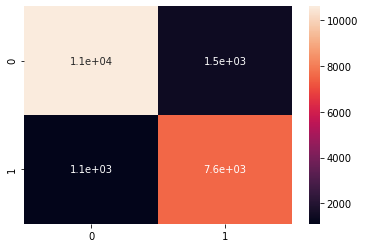

In [ ]:
cn = confusion_matrix(y_pred,y_test)
sns.heatmap(cn, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11715
           1       0.87      0.84      0.86      9066

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy{}%'.format(100 *  accuracy_score(y_pred, y_test)))  

Accuracy96.04927578076126%


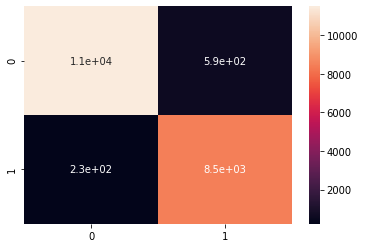

In [ ]:
cn = confusion_matrix(y_pred,y_test)
sns.heatmap(cn, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11715
           1       0.97      0.94      0.95      9066

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



## DEEP LEARNING MODEL

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation ='relu', input_shape=(26,)))
model.add(tf.keras.layers.Dense(units = 500, activation ='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation ='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               13500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 515,001
Trainable params: 515,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
epocs_his=model.fit(X_train, y_train,epochs=100, batch_size=50)

Epoch 1/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.1835 - accuracy: 0.9236
Epoch 2/100
1663/1663 [==============================] - 14s 8ms/step - loss: 0.1283 - accuracy: 0.9463
Epoch 3/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.1150 - accuracy: 0.9512
Epoch 4/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.1101 - accuracy: 0.9532
Epoch 5/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.1051 - accuracy: 0.9557
Epoch 6/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.1041 - accuracy: 0.9560
Epoch 7/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.0989 - accuracy: 0.9578
Epoch 8/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.0980 - accuracy: 0.9586
Epoch 9/100
1663/1663 [==============================] - 13s 8ms/step - loss: 0.0970 - accuracy: 0.9587
Epoch 10/100
1663/1663 [==============================] - 13s 8m

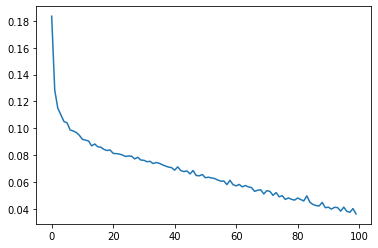

In [ ]:
plt.plot(epocs_his.history['loss'])

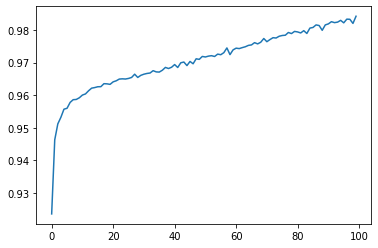

In [ ]:
plt.plot(epocs_his.history['accuracy'])

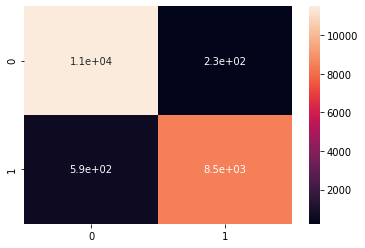

In [ ]:
cn = confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)